# **Fetch Kaggle Dataset to Colab**
Dataset source: https://www.kaggle.com/sanikamal/rock-paper-scissors-dataset

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! pip install -q kaggle

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/belajar-ml

/content/drive/MyDrive/belajar-ml


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/belajar-ml/'

In [ ]:
! kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

 98% 443M/452M [00:02<00:00, 180MB/s]
100% 452M/452M [00:02<00:00, 164MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

# **Mulai Pengerjaan**

In [ ]:
# import libraries
import numpy as np
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [ ]:
import os

train_dir = '/content/drive/MyDrive/belajar-ml/Rock-Paper-Scissors/train'
test_dir = '/content/drive/MyDrive/belajar-ml/Rock-Paper-Scissors/test'
validation_dir = '/content/drive/MyDrive/belajar-ml/Rock-Paper-Scissors/validation'


train = os.listdir(train_dir)
test = os.listdir(test_dir)
val = os.listdir(validation_dir)

n_train = {}
n_test = {}
n_val = len(os.listdir(validation_dir))

total_train, total_test = 0, 0

for i in train:
  n_train[i] = len(os.listdir(os.path.join(train_dir, i)))
  total_train = total_train + len(os.listdir(os.path.join(train_dir, i)))

for i in test:
  n_test[i] = len(os.listdir(os.path.join(test_dir, i)))
  total_test = total_test + len(os.listdir(os.path.join(test_dir, i)))



Total Train: 2520
Total Test: 372
Validation: 33


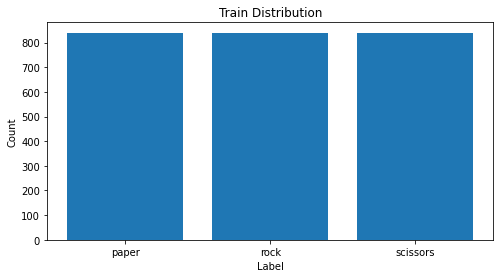

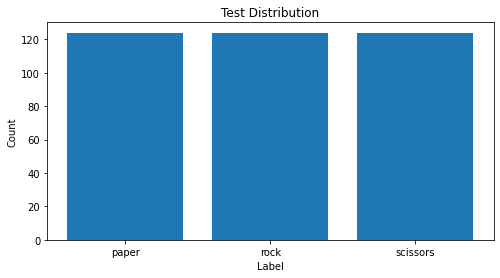

In [ ]:
import matplotlib.pyplot as plt

train_keys = list(n_train.keys())
train_value = list(n_train.values())

test_keys = list(n_test.keys())
test_value = list(n_test.values())

plt.figure(figsize=(8,4))
plt.bar(train_keys, train_value)
plt.title('Train Distribution')
plt.ylabel('Count')
plt.xlabel('Label')

plt.figure(figsize=(8,4))
plt.bar(test_keys, test_value)
plt.title('Test Distribution')
plt.ylabel('Count')
plt.xlabel('Label')

print('Total Train:', total_train)
print('Total Test:', total_test)
print('Validation:', n_val)

In [ ]:
pwd

'/content/drive/My Drive/belajar-ml'

In [ ]:
cd /content/drive/My Drive/belajar-ml/Rock-Paper-Scissors

/content/drive/My Drive/belajar-ml/Rock-Paper-Scissors


In [ ]:
! cp -R validation val

In [ ]:
cd val

/content/drive/My Drive/belajar-ml/Rock-Paper-Scissors/val


In [ ]:
! mkdir paper rock scissors

In [ ]:
batch_size = 32

# augmentasi gambar
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=90,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=90)

val_datagen = ImageDataGenerator(rescale=1./255)


# menyiapkan data latih
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=batch_size,
                                                       class_mode='categorical')

val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/belajar-ml/Rock-Paper-Scissors/val',
                                                target_size=(150, 150),
                                                batch_size=batch_size,
                                                shuffle=False,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 0 images belonging to 0 classes.
Found 33 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
# inisiasi callback
fp_save_weights = '/content/drive/MyDrive/belajar-ml/best_weights/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.h5'

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            min_delta=0,
                                            patience=15,
                                            verbose=0,
                                            mode='auto',
                                            baseline=None,
                                            restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3,
                                                 verbose=1,
                                                 min_lr=0.001)

save_weights = tf.keras.callbacks.ModelCheckpoint(fp_save_weights,
                                                  monitor='val_loss',
                                                  verbose=1,
                                                  save_best_only=True,
                                                  mode='min')

In [ ]:
# inisiasi arsitektur CNN dengan dropout
modeld = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compile 
modeld.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy']
             )

In [ ]:
modeld.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 15, 15, 128)     

In [ ]:
# latih model
plotd = modeld.fit(train_generator,
                   epochs=100,
                   verbose=1,
                   validation_data=test_generator,
                   steps_per_epoch=np.ceil(total_train/batch_size), # total train = batch_size * steps 
                   validation_steps=np.ceil(total_test/batch_size), # total val = batch_size * steps
                   callbacks=[callback, reduce_lr, save_weights],
                  )

Epoch 1/100
79/79 [==============================] - 24s 293ms/step - loss: 1.0990 - accuracy: 0.3675 - val_loss: 1.0246 - val_accuracy: 0.4167

Epoch 00001: val_loss improved from inf to 1.02462, saving model to /content/drive/MyDrive/belajar-ml/best_weights/my_best_model.epoch01-loss1.02.h5
Epoch 2/100
79/79 [==============================] - 23s 290ms/step - loss: 0.9912 - accuracy: 0.4929 - val_loss: 0.9437 - val_accuracy: 0.5457

Epoch 00002: val_loss improved from 1.02462 to 0.94366, saving model to /content/drive/MyDrive/belajar-ml/best_weights/my_best_model.epoch02-loss0.94.h5
Epoch 3/100
79/79 [==============================] - 23s 289ms/step - loss: 0.8373 - accuracy: 0.5925 - val_loss: 0.5873 - val_accuracy: 0.7527

Epoch 00003: val_loss improved from 0.94366 to 0.58728, saving model to /content/drive/MyDrive/belajar-ml/best_weights/my_best_model.epoch03-loss0.59.h5
Epoch 4/100
79/79 [==============================] - 23s 289ms/step - loss: 0.6180 - accuracy: 0.7353 - val_lo

In [ ]:
# menyimpan weight model
modeld.save('/content/drive/MyDrive/belajar-ml/trained/rh_model_fix_20juni')
modeld.save_weights('/content/drive/MyDrive/belajar-ml/trained/rh_model_fix_20juni_weights.h5')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/belajar-ml/trained/rh_model_fix_20juni/assets


In [ ]:
import pandas as pd

df = pd.DataFrame(modeld.history.history)
df

,loss,accuracy,val_loss,val_accuracy,lr
0,1.098990,0.367460,1.024619,0.416667,0.001
1,0.991166,0.492857,0.943659,0.545699,0.001
2,0.837326,0.592460,0.587277,0.752688,0.001
3,0.618022,0.735317,0.337037,0.881720,0.001
4,0.505316,0.802381,0.520735,0.809140,0.001
5,0.437014,0.819444,0.299417,0.900538,0.001
6,0.342651,0.868254,0.182908,0.948925,0.001
7,0.264762,0.900397,0.179773,0.948925,0.001
8,0.251920,0.911905,0.144698,0.940860,0.001
9,0.212381,0.924206,0.364706,0.860215,0.001


Text(0, 0.5, 'Accuracy')

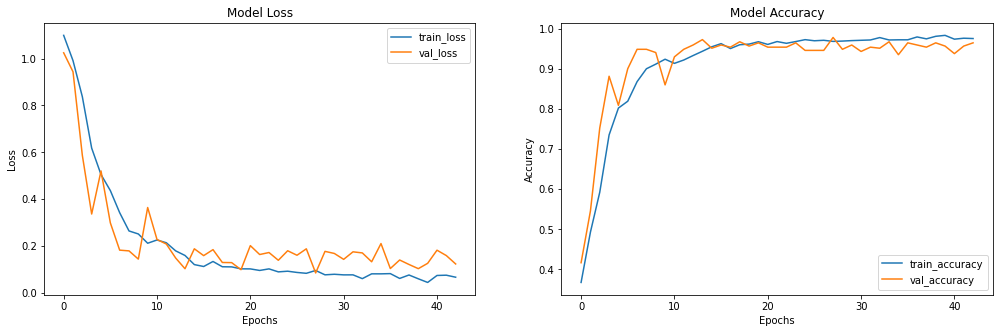

In [ ]:
fig, axes = plt.subplots(1, 2)

df.plot(kind='line', y='loss', label='train_loss', ax=axes[0], figsize=(17,5))
df.plot(kind='line', y='val_loss', ax=axes[0])
df.plot(kind='line', y='accuracy', label='train_accuracy', ax=axes[1])
df.plot(kind='line', y='val_accuracy', ax=axes[1])
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')

In [ ]:
test_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
# fungsi prediksi

def prediksi(filepath):
  img = image.load_img(filepath, target_size=(150,150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = modeld.predict(images)

  if classes[0][0] == 1:
    predicted = 'Predicted as Paper'
  elif classes[0][1] == 1:
    predicted = 'Predicted as Rock'
  elif classes[0][2] == 1:
    predicted = 'Predicted as Scissors'
  
  return predicted

In [ ]:
test = os.listdir(validation_dir)
len(test)






33

In [ ]:
test

['paper-hires1.png',
 'paper1.png',
 'paper7.png',
 'paper8.png',
 'scissors4.png',
 'scissors3.png',
 'rock4.png',
 'paper4.png',
 'rock7.png',
 'rock5.png',
 'scissors7.png',
 'paper6.png',
 'rock-hires2.png',
 'scissors8.png',
 'rock3.png',
 'scissors-hires1.png',
 'rock6.png',
 'rock8.png',
 'rock2.png',
 'rock1.png',
 'paper3.png',
 'paper2.png',
 'rock9.png',
 'scissors6.png',
 'scissors2.png',
 'rock-hires1.png',
 'scissors5.png',
 'paper9.png',
 'paper5.png',
 'scissors-hires2.png',
 'scissors1.png',
 'paper-hires2.png',
 'scissors9.png']

In [ ]:
hasil_prediksi = list()

for i in test:
  filepath = os.path.join(validation_dir, i)
  prediksii = prediksi(filepath)
  hasil_prediksi.append(prediksii)


In [ ]:
test_akhir = pd.DataFrame(list(zip(test, hasil_prediksi)), columns=['Filename', 'Predictions'])
test_akhir

,Filename,Predictions
0,paper-hires1.png,Predicted as Paper
1,paper-hires2.png,Predicted as Paper
2,paper1.png,Predicted as Paper
3,paper2.png,Predicted as Paper
4,paper3.png,Predicted as Paper
5,paper4.png,Predicted as Paper
6,paper5.png,Predicted as Paper
7,paper6.png,Predicted as Paper
8,paper7.png,Predicted as Paper
9,paper8.png,Predicted as Paper


In [ ]:
test_foto = os.listdir('/content/drive/MyDrive/belajar-ml/Rock-Paper-Scissors/test_foto')
test_foto

['paper.jpeg',
 'scissors-lefthand.jpeg',
 'scissors.jpg',
 'scissors.jpeg',
 'rock3.jpeg',
 'rock2.jpg',
 'rock.jpeg',
 'paper-lefthand.jpg']

In [ ]:
prediksi_foto = list()

for i in test_foto:
  filepath = os.path.join('/content/drive/MyDrive/belajar-ml/Rock-Paper-Scissors/test_foto', i)
  prediksii = prediksi(filepath)
  prediksi_foto.append(prediksii)

pd_test_foto = pd.DataFrame(list(zip(test_foto, prediksi_foto)), columns=['Filename', 'Predictions'])
pd_test_foto

,Filename,Predictions
0,paper.jpeg,Predicted as Paper
1,scissors-lefthand.jpeg,Predicted as Scissors
2,scissors.jpg,Predicted as Scissors
3,scissors.jpeg,Predicted as Scissors
4,rock3.jpeg,Predicted as Rock
5,rock2.jpg,Predicted as Rock
6,rock.jpeg,Predicted as Rock
7,paper-lefthand.jpg,Predicted as Paper


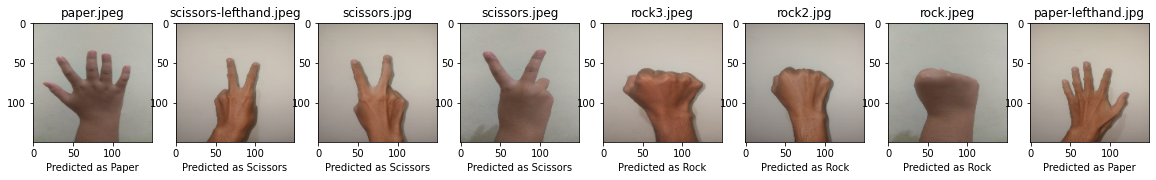

In [ ]:
plot_ke = 1
pred = 0
plt.figure(figsize=(20,5))
for i in test_foto:
  filepath = os.path.join('/content/drive/MyDrive/belajar-ml/Rock-Paper-Scissors/test_foto', i)
  foto = image.load_img(filepath, target_size=(150,150))
  plt.subplot(1, 8, plot_ke)
  plt.imshow(foto)
  plt.title(i)
  plt.xlabel(pd_test_foto['Predictions'][pred])
  plot_ke+=1
  pred+=1



In [ ]:
from sklearn.metrics import classification_report

vall = val_generator.filenames
n_vall = len(vall)

Y_pred = modeld.predict_generator(val_generator, steps = n_vall)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(val_generator.classes, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

